In [1]:
from utils import *

In [3]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'mps'
depth = 5

dataset = MNISTtrainer(batch_size)
params = dict(device=device,
                width=50, lr=0.01, num_train=4,
                sb=1, depth= depth, sw=1.5)

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params['depth'], params['width']).to(device)

pretrain_acc, pre_trained_model = compute_training_acc_epochs(model, dataset, params, debug=True)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Train set: Average loss: 0.9532, Accuracy: 42254.0/60000 (70%)

Epoch: 0 	Training Accuracy: 70.42%

Train set: Average loss: 0.6438, Accuracy: 48216.0/60000 (80%)

Epoch: 1 	Training Accuracy: 80.36%

Train set: Average loss: 0.5141, Accuracy: 50634.0/60000 (84%)

Epoch: 2 	Training Accuracy: 84.39%

Train set: Average loss: 0.4440, Accuracy: 51943.0/60000 (87%)

Epoch: 3 	Training Accuracy: 86.57%

Train set: Average loss: 0.4440, 

In [3]:
test_acc = eval(model, device, dataset.loader, False)
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 0.88%


In [ ]:
cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], dataset, params, debug=True)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

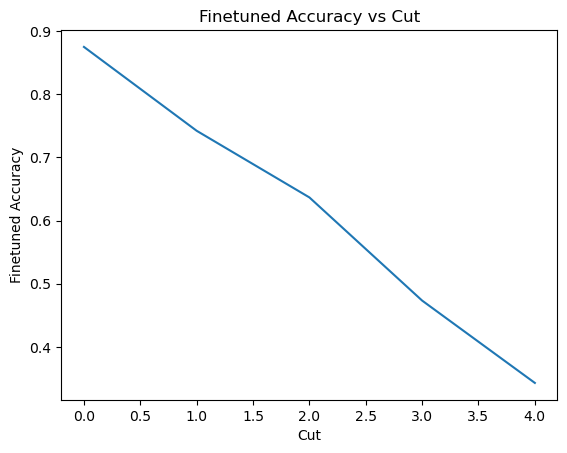

In [9]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

-----

## Fashion Mnist

### Baseline, end to end trained model

In [4]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'mps'
depth = 5

fashion_dataset = FashionMNISTtrainer(batch_size)
params = dict(device=device,
                width=50, lr=0.01, num_train=4,
                sb=1, depth= depth, sw=1.5)

fashion_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params['depth'], params['width']).to(device)

pretrain_acc, pre_trained_model = compute_training_acc_epochs(fashion_model, fashion_dataset, params, debug=True)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Train set: Average loss: 0.8191, Accuracy: 42975.0/60000 (72%)

Epoch: 0 	Training Accuracy: 71.62%

Train set: Average loss: 0.6768, Accuracy: 45237.0/60000 (75%)

Epoch: 1 	Training Accuracy: 75.39%

Train set: Average loss: 0.6093, Accuracy: 46827.0/60000 (78%)

Epoch: 2 	Training Accuracy: 78.05%

Train set: Average loss: 0.5691, Accuracy: 47610.0/60000 (79%)

Epoch: 3 	Training Accuracy: 79.35%

Train set: Average loss: 0.5691, 

### finetuned staring from regular mnist 

In [6]:
#luckily, the number of classes is the same, so we don't need to change the last layer.

cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], fashion_dataset, params, debug=False)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

In [9]:
from pprint import pprint

for i, mod in enumerate(cut_models):
    print(f"Cut {i}:")
    pprint(mod['finetuned_acc'])

Cut 0:
0.7911
Cut 1:
0.7381833333333333
Cut 2:
0.6858333333333333
Cut 3:
0.6187833333333334
Cut 4:
0.27591666666666664


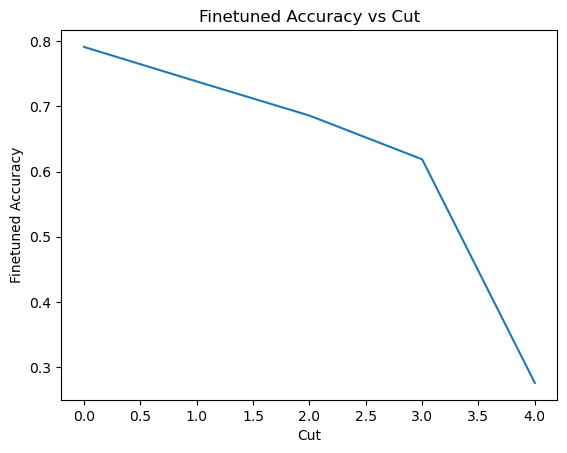

In [7]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

----